Importing the required libraries

In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization


Loading the Data

In [19]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [20]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the Data

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
y_train[0]

5

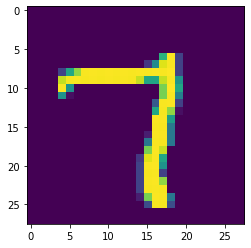

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6590])

In [24]:
import numpy as np

np.argmax(y_train[5100])

0

Reshaping The Data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

11490434/11490434 [==============================] - 0s 0us/step


Add CNN Layers

In [3]:
#create model
model=Sequential ()

In [4]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
#flatten the dimension of the image
model.add(Flatten())

In [6]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [7]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [15]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.1116 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.1508 - val_accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.1259 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.1516 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.1778 - val_accuracy: 0.9765


Observing the metrics


In [12]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1076277494430542, 0.9783999919891357]


In [13]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[3.7901302e-16 7.5116180e-18 5.6935355e-12 8.7690895e-09 4.2659912e-02
  1.9877568e-09 3.9692727e-20 7.4499064e-07 8.4937146e-06 9.5733088e-01]]


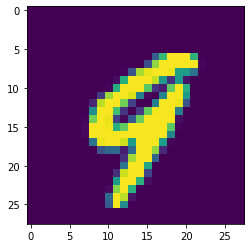

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_test[5100])

In [26]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [27]:
np.argmax(y_test[5100:5101]) #printing the actual labels

0

Save The model

In [28]:
# Save the model
model.save('models/mnistCNN.h5')